DATA MINING TERM PROJECT INITIAL COMMIT TEAM 9

In [1]:
print("Data Mining - Group MÜKkemmel")
print("mmm")

Data Mining - Group MÜKkemmel
mmm


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
url = 'https://raw.githubusercontent.com/kutlinho/Team9_CryptocurrencyForecasting/master/BTC-USD.csv'
dataset = pd.read_csv(url)

In [4]:
np.random.seed(0) 
dataset.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1108,2017-09-29,4171.620117,4214.629883,4039.290039,4163.069824,4163.069824,1367049984
2293,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605
224,2015-04-29,225.591003,227.039993,223.429993,225.807999,225.807999,18936500
45,2014-11-01,338.649994,340.528992,321.054993,325.748993,325.748993,16677200
1599,2019-02-02,3484.625977,3523.287354,3467.574707,3521.060791,3521.060791,5071623601
501,2016-01-31,378.292999,380.346985,367.834991,368.766998,368.766998,37894300
1789,2019-08-11,11349.740234,11523.579102,11248.294922,11523.579102,11523.579102,15774371518
1569,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2790,2022-05-08,35502.941406,35502.941406,33878.964844,34059.265625,34059.265625,36763041910
1464,2018-09-20,6398.850098,6529.259766,6395.950195,6519.669922,6519.669922,4348110000


In [5]:
missing_values_count = dataset.isnull().sum()
missing_values_count[0:15]

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
total_cells = np.product(dataset.shape)
total_missing = missing_values_count.sum()
dataset.dropna()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3480,2024-03-28,69452.773438,71546.023438,68895.507813,70744.953125,70744.953125,34374900617
3481,2024-03-29,70744.796875,70913.093750,69076.656250,69892.828125,69892.828125,25230851763
3482,2024-03-30,69893.445313,70355.492188,69601.062500,69645.304688,69645.304688,17130241883
3483,2024-03-31,69647.781250,71377.781250,69624.867188,71333.648438,71333.648438,20050941373


In [7]:
colomns_with_na_dropped = dataset.dropna(axis=1)
print("The number of columns after removing missing values : %d" % colomns_with_na_dropped.shape[1])

The number of columns after removing missing values : 7


In [8]:
dataset_train = pd.read_csv(url) 
training_set = dataset_train.iloc[:, 1:2].values

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
train_size = int(len(training_set) * 0.8)
test_size = len(training_set) - train_size
train_data, test_data = training_set_scaled[:train_size], training_set_scaled[train_size:]


In [11]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [13]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100,batch_size=32)

c:\Users\Miray Balgız\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 4.9324e-04 - loss: 0.0033
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 1.1382e-04 - loss: 0.0031
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 6.3944e-04 - loss: 0.0029
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.0012 - loss: 0.0029
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 5.8135e-05 - loss: 0.0030
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 3.0281e-04 - loss: 0.0031
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 6.9962e-04 - loss: 0.0031
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 8.5197e-05 - loss: 0.0031
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 5.8578e-04 - loss: 0.0030
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.0013 - loss: 0.0029
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.0023 - loss: 0.0030
Epoch 12/100
62/62 ━

In [14]:
history

In [15]:
import plotly.graph_objects as go

# Plot training & validation accuracy values
fig = go.Figure()

fig.add_trace(go.Scatter(y = history.history['loss'],
                    mode='lines+markers',
                    name='Training loss'))
fig.add_trace(go.Scatter(y = history.history['val_loss'],
                    mode='lines+markers',
                    name='Validation loss'))

fig.update_layout(title_text = 'Loss of model')
fig.show()

KeyError: 'val_loss'

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


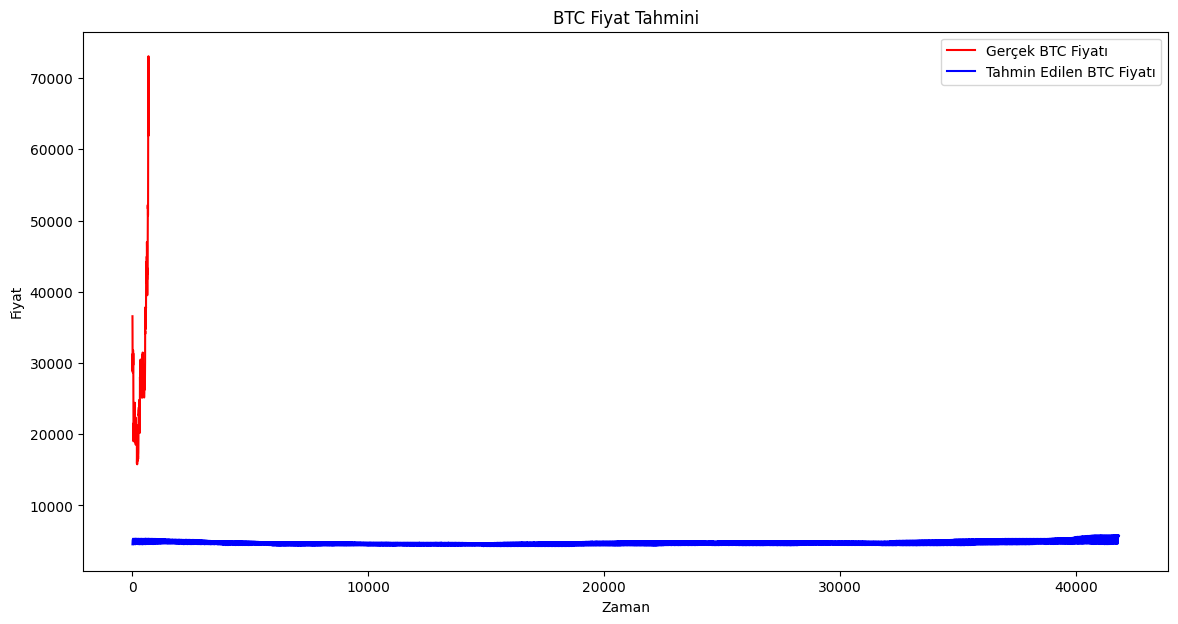

In [54]:
test_set = dataset.iloc[int(len(dataset)*0.8):, 1:2].values


# Test verilerini hazırlama
dataset_total = pd.concat((dataset.iloc[:int(len(dataset)*0.8), 1:2], dataset.iloc[int(len(dataset)*0.8):, 1:2]), axis=0)
test_inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
test_inputs = sc.transform(test_inputs)
#test_inputs = dataset.iloc[len(dataset) - len(test_data) - 60:, 1:].values
#test_inputs = test_inputs.reshape(-1,1)


X_test = []
for i in range(60, len(test_inputs)):
    X_test.append(test_inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Tahminler
predicted_price = model.predict(X_test)
predicted_price = predicted_price.reshape(-1, 1)
predicted_price = sc.inverse_transform(predicted_price)

# Gerçek fiyatları ayarla
real_price = test_set

# Grafiği oluştur
plt.figure(figsize=(14, 7))
plt.plot(real_price, color='red', label='Gerçek BTC Fiyatı')
plt.plot(predicted_price, color='blue', label='Tahmin Edilen BTC Fiyatı')
plt.title('BTC Fiyat Tahmini')
plt.xlabel('Zaman')
plt.ylabel('Fiyat')
plt.legend()
plt.show()


In [51]:
# Gerçek fiyatlar
real_price = dataset_train.iloc[train_size:, 1:2].values

# Tahminler
predicted_price = predicted_price[:len(real_price)]

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tahminleri gerçek fiyatlarla karşılaştırmadan önce boyut kontrolü
print("real_price boyutu:", real_price.shape)
print("predicted_price boyutu:", predicted_price.shape)

# Hata metriklerini hesaplama
mae = mean_absolute_error(real_price, predicted_price)
mse = mean_squared_error(real_price, predicted_price)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((real_price - predicted_price) / real_price)) * 100

# Sonuçları tablo olarak sunma
import pandas as pd

results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

print(results)

real_price boyutu: (697, 1)
predicted_price boyutu: (697, 1)
  Metric         Value
0    MAE  2.435848e+04
1    MSE  7.327832e+08
2   RMSE  2.706997e+04
3   MAPE  8.026195e+01


In [52]:
dates = dataset['Date']  

# Büyük fiyat değişimlerinin olduğu günlerin belirlenmesi
threshold = 23600   # Eşik değeri
significant_days = [i for i, (real, pred) in enumerate(zip(real_price, predicted_price)) if abs(real - pred) > threshold]

# Performans
performance_table = pd.DataFrame({
    'Date': [dates[i] for i in significant_days], 
    'MAE': [mae for _ in significant_days], 
    'MSE': [mse for _ in significant_days], 
    'RMSE': [rmse for _ in significant_days],  
    'MAPE': [mape for _ in significant_days],  
})

print(performance_table.head(10))


         Date          MAE           MSE        RMSE       MAPE
0  2014-09-17  24358.48234  7.327832e+08  27069.9692  80.261948
1  2014-09-18  24358.48234  7.327832e+08  27069.9692  80.261948
2  2014-09-19  24358.48234  7.327832e+08  27069.9692  80.261948
3  2014-09-20  24358.48234  7.327832e+08  27069.9692  80.261948
4  2014-09-21  24358.48234  7.327832e+08  27069.9692  80.261948
5  2014-09-22  24358.48234  7.327832e+08  27069.9692  80.261948
6  2014-09-23  24358.48234  7.327832e+08  27069.9692  80.261948
7  2014-09-24  24358.48234  7.327832e+08  27069.9692  80.261948
8  2014-09-25  24358.48234  7.327832e+08  27069.9692  80.261948
9  2014-09-26  24358.48234  7.327832e+08  27069.9692  80.261948


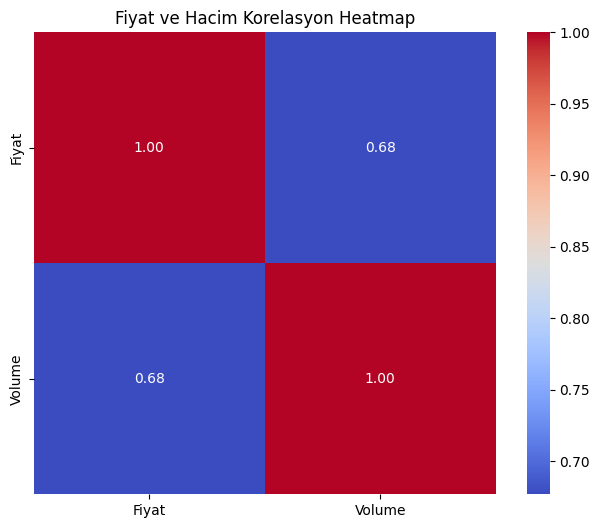

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


volumes = dataset['Volume']  
open_prices=dataset['Open']
# Fiyat ve hacim verilerini içeren bir veri çerçevesi oluşturun (örneğin)
data = {
    'Fiyat': open_prices,  # fiyatlar değişkenini uygun şekilde değiştirin
    'Volume': volumes   # hacimler değişkenini uygun şekilde değiştirin
}
df = pd.DataFrame(data)

# Korelasyon matrisini hesaplayın
corr_matrix = df.corr()

# Heatmap'i görselleştirin
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Fiyat ve Hacim Korelasyon Heatmap')
plt.show()


Bu grafik, fiyat ve hacim arasındaki korelasyonu gösteren bir heatmap (ısı haritası). Korelasyon, iki değişken arasındaki ilişkiyi ölçer ve -1 ile 1 arasında bir değer alır. 1, pozitif yönde mükemmel bir ilişkiyi, -1 negatif yönde mükemmel bir ilişkiyi, 0 ise hiçbir ilişki olmadığını gösterir.

Grafikteki detaylar:

1. **Korelasyon Değerleri:**
   - Fiyat ile Fiyat arasındaki korelasyon 1.00, bu doğal olarak böyledir çünkü bir değişkenin kendisiyle olan ilişkisi her zaman mükemmeldir.
   - Hacim ile Hacim arasındaki korelasyon da 1.00, bu da doğal olarak aynıdır.
   - Fiyat ile Hacim arasındaki korelasyon 0.68, bu da pozitif bir korelasyon olduğunu ve fiyat arttıkça hacmin de arttığını gösterir.

2. **Renkler:**
   - Kırmızı renkler yüksek pozitif korelasyonu, yani 1'e yakın değerleri gösterir.
   - Mavi renkler ise daha düşük pozitif korelasyonu gösterir.


Bu grafiğe göre, fiyat ve hacim arasında pozitif bir ilişki var. Yani fiyat yükseldiğinde genellikle hacim de artma eğilimindedir ve bu ilişki orta derecede güçlüdür (0.68).

Fiyatlar arttıkça hacim de artar.

loss grafiği ---> Kutluhan //
accuracy de ona göre revize ederim. 